# 10. Hoof It

```
...0...
...1...
...2...
6543456
7.....7
8.....8
9.....9
```

1. Figure out to how many peaks (`9`) each traiolead (`0`) leads, if height can only increase by one on each cell of path
2. Figure out how many paths lead to a peak

--- 
Implementation of Flood Fill algorithm:
1. Is current cell peak? -> Yes, store peak and return
2. Call this function on all neighbouring cells that have height 1 bigger than current height
3. If no move is possible, return

Part 1:  659
Part 2:  1463


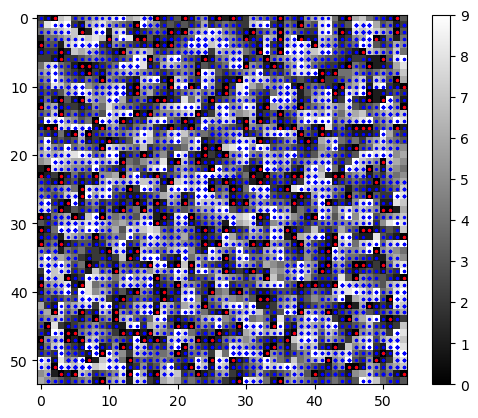

In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open("input.txt", "r") as file:
    data = [[int(i) for i in line if i != "\n"] for line in file.readlines()]

Directions = [
    np.array([0, -1]), # Up
    np.array([1, 0]), # Left
    np.array([0, 1]), # Down
    np.array([-1, 0])] # Right

pathCoords = [] # For visualization (all visited cells)
peaksFound = np.empty((0, 2), int) # Part 1 temporary variable (i didnt manage to include it as pathfinder() argument)
FoundPeaks = {} # Part 2

# Possible improvement: Get rid of global variables
def pathfinder(CurrCoords, currHeight):
    global peaksFound
    if currHeight == 9:
        pathCoords.append(CurrCoords)
        peaksFound = np.vstack((peaksFound, CurrCoords)) # Return coordinates of peak
        
        if tuple(CurrCoords) in FoundPeaks:
            FoundPeaks[tuple(CurrCoords)] += 1
        else:
            FoundPeaks[tuple(CurrCoords)] = 1
        return
    
    # Get cell up, down, left and right and call pathfinder()
    for direct in Directions:
        NextCoords = CurrCoords + direct

        x, y = NextCoords
        if not (0 <= x < len(data[0]) and 0 <= y < len(data)):
            continue
        
        nextHeight = data[y][x] # Obtain height of next cell in this direction
        
        if nextHeight == currHeight + 1: # Check if next cell goes uphill
            pathfinder(NextCoords, nextHeight) # Move to next cell
            pathCoords.append(CurrCoords)
    
    return

pathScores = 0
pathRatings = 0


trailheads = []
for y, line in enumerate(data):
    for x, height in enumerate(line):
        if height == 0:
            trailheads.append([x, y])

            # Find paths
            peaksFound = np.empty((0, 2), int)
            pathfinder([x, y], 0)

            if peaksFound.size > 0:
                unique_peaks = np.unique(peaksFound, axis=0)
                pathScores += len(unique_peaks)

for peak in FoundPeaks.items():
    pathRatings += peak[1]

print("Part 1: ", pathScores)
print("Part 2: ", pathRatings)



#### VISUALIZATION #####

trailheads = np.transpose(trailheads)
path = np.transpose(pathCoords)

plt.scatter(trailheads[0], trailheads[1], color='red', zorder = 10, s=2)
plt.scatter(path[0], path[1], color='blue', s=2)
plt.imshow(data, interpolation='nearest', cmap='gray')
plt.colorbar()
plt.show()